# Telecom Churn Case Study - Rucha Tare(Group Facilitator) and Anjali Kashyap(Member)

## Step 1 : Data sourcing 

### 1.1 : Importing Libraries to python , mapping Gdrive , Importing datasets

In [ ]:
!pip install fancyimpute

In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Importing needed libraries to python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

### 1.2: Set PD options 

As a practice , it is good to set PD options as we have a large dataset

In [ ]:
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1.3: Import CSV file

Mounting the drive, as data set is loaded on the drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing CSV file 

In [ ]:
churn = pd.read_csv("/content/drive/My Drive/telecom_churn_data.csv", engine='python', encoding='utf-8')

Checking the imported data


In [ ]:
churn.shape

(99999, 226)

In [ ]:
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [ ]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,

In [ ]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.000,99999.000,98981.000,98981.000,98981.000,99999.000,99999.000,99999.000,99999.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.000,99999.000,99999.000,99999.000,99999.000,96062.000,96140.000,94621.000,92254.000,96062.000,96140.000,94621.000,92254.00

Checking the data types of the dataset

In [ ]:
churn.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

### 1.4: Checking the categorical and numeric data 

Checking the columns with Dtype as object

In [ ]:
churn[list(churn.dtypes[churn.dtypes=='object'].index)].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


Checking the Dtype not object which means its numerical data

In [ ]:
churn[list(churn.dtypes[churn.dtypes!='object'].index)].head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.000,1.000,1.000,nan,252.000,252.000,252.000,nan,0.000,0.000,0.000,nan,1.000,1.000,1.000,nan,252.000,252.000,252.000,nan,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000,212.170,212.170,212.170,nan,212.

### 1.5: Backing up the data - As a practice

In [ ]:
Backup = churn.copy()

## Step 2 : Data Cleaning

### 2.1 : Checking for redundant data/ Non Unique columns 

In [ ]:
unique_col = churn.nunique()
unique_col = unique_col[unique_col.values == 1]
print(unique_col)

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64


We will drop these columns as these columns just have one unique value 

In [ ]:
churn.drop(['circle_id' , 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6' ,'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9' ],axis='columns', inplace=True)

Checking the data shape after dropping the columns

In [ ]:
churn.shape

(99999, 210)

### Now we have 210 columns 

### 2.2 Dropping columns that are irrelevant to us

We also donot require the date columns :
1. date_of_last_rech_data_6
2. date_of_last_rech_data_7
3. date_of_last_rech_data_8
4. date_of_last_rech_data_9
5. date_of_last_rech_6
6. date_of_last_rech_7
7. date_of_last_rech_8
8. date_of_last_rech_9

So we will drop these columns 

In [ ]:
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 
                'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

In [ ]:
churn.drop(date_columns, axis = 1, inplace = True)

Checking the shape again after dropping the date columns


In [ ]:
churn.shape

(99999, 202)

### Conclusion Now we have 202 columns

### 2.3 Checking for duplicate rows

In [ ]:
churn.drop_duplicates(subset=None,inplace=True)

In [ ]:
churn.shape

(99999, 202)

There were no duplicate rows in the dataframe

Checking the percentange of missing values 

In [ ]:
round(churn.isnull().sum()/len(churn.index),2).sort_values(ascending=False)

count_rech_3g_6      0.750
max_rech_data_6      0.750
night_pck_user_6     0.750
av_rech_amt_data_6   0.750
total_rech_data_6    0.750
fb_user_6            0.750
arpu_2g_6            0.750
count_rech_2g_6      0.750
arpu_3g_6            0.750
arpu_2g_9            0.740
arpu_2g_8            0.740
arpu_2g_7            0.740
arpu_3g_9            0.740
arpu_3g_8            0.740
arpu_3g_7            0.740
count_rech_2g_8      0.740
max_rech_data_7      0.740
night_pck_user_7     0.740
max_rech_data_9      0.740
count_rech_2g_7      0.740
count_rech_2g_9      0.740
av_rech_amt_data_9   0.740
av_rech_amt_data_8   0.740
av_rech_amt_data_7   0.740
count_rech_3g_9      0.740
count_rech_3g_8      0.740
max_rech_data_8      0.740
night_pck_user_8     0.740
night_pck_user_9     0.740
total_rech_data_9    0.740
fb_user_9            0.740
fb_user_8            0.740
fb_user_7            0.740
count_rech_3g_7      0.740
total_rech_data_8    0.740
total_rech_data_7    0.740
loc_og_t2c_mou_9     0.080
l

Checking columns that have more than 70% missing values 

In [ ]:
round(churn.isnull().sum()/len(churn.index),2)[round(churn.isnull().sum()/len(churn.index),2).values>0.70]

total_rech_data_6    0.750
total_rech_data_7    0.740
total_rech_data_8    0.740
total_rech_data_9    0.740
max_rech_data_6      0.750
max_rech_data_7      0.740
max_rech_data_8      0.740
max_rech_data_9      0.740
count_rech_2g_6      0.750
count_rech_2g_7      0.740
count_rech_2g_8      0.740
count_rech_2g_9      0.740
count_rech_3g_6      0.750
count_rech_3g_7      0.740
count_rech_3g_8      0.740
count_rech_3g_9      0.740
av_rech_amt_data_6   0.750
av_rech_amt_data_7   0.740
av_rech_amt_data_8   0.740
av_rech_amt_data_9   0.740
arpu_3g_6            0.750
arpu_3g_7            0.740
arpu_3g_8            0.740
arpu_3g_9            0.740
arpu_2g_6            0.750
arpu_2g_7            0.740
arpu_2g_8            0.740
arpu_2g_9            0.740
night_pck_user_6     0.750
night_pck_user_7     0.740
night_pck_user_8     0.740
night_pck_user_9     0.740
fb_user_6            0.750
fb_user_7            0.740
fb_user_8            0.740
fb_user_9            0.740
dtype: float64

We cannot simply drop these columns based on the missing values , as these are important columns for our analysis , lets check the data again

In [ ]:
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.000,1.000,1.000,nan,252.000,252.000,252.000,nan,0.000,0.000,0.000,nan,1.000,1.000,1.000,nan,252.000,252.000,252.000,nan,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000,212.170,212.170,212.170,nan,212.170,212.170,212.170,nan,0.000,0.000,0.000,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.000,1.000,1.000,nan,968,30.400,0.000,101.200,3.580
1,7001865778,34.047,355.074,268.321,86.285,24.110,78.680,7.680,18.340,15.740,99.840,304.760,53.760,0.000,0.000,0.000,0

 We will there fore impute the columns with zero For all recharge columns 0 means that the customer did not recharge with any amount
 

Creating a list of all the columns we need  to impute zero with

In [ ]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7','total_rech_data_8' , 'total_rech_data_9' ,'max_rech_data_6', 'max_rech_data_7','max_rech_data_8','max_rech_data_9',
               'av_rech_amt_data_6', 'av_rech_amt_data_7','av_rech_amt_data_8', 'av_rech_amt_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9'] 

Imputing zero to the columns and checking the nulls again

In [ ]:
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [ ]:
churn[zero_impute].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
dtype: int64

We still need to handle missing values in the other columns 
For Fb and night pack users we cannot determine if the person has opted or not for fb or night pack hence we will impute the missing values with -1 to create a new category 

In [ ]:
minus_impute =['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
churn[minus_impute] = churn[minus_impute].apply(lambda x: x.fillna(-1))

Checking the values after imputing -1

In [ ]:
churn[minus_impute].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

### 2.4 Using MICE to impute rest of the missing values 

In [ ]:
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.000,1.000,1.000,0.000,252.000,252.000,252.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,nan,252.000,252.000,252.000,0.000,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000,212.170,212.170,212.170,nan,212.170,212.170,212.170,nan,0.000,0.000,0.000,-1.000,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.000,1.000,1.000,-1.000,968,30.400,0.000,101.200,3.580
1,7001865778,34.047,355.074,268.321,86.285,24.110,78.680,7.680,18.340,15.740,99.840,304.760,53.760,0.000

In [ ]:
churn_columns = churn.columns

In [ ]:
miceImputed =churn.copy(deep=True)
mice_imputer = IterativeImputer()
miceImputed.iloc[:, :] = mice_imputer.fit_transform(churn)

In [ ]:
miceImputed.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753.000,197.385,214.816,213.803,21.100,-45.573,-17.156,0.000,-32.945,186.581,174.551,0.000,172.465,30.938,22.099,0.000,22.282,13.813,5.023,0.000,3.602,41.215,27.824,0.000,35.091,93.342,91.393,0.000,90.462,3.749,3.791,0.000,3.652,-7.979,-14.503,0.000,-10.687,5.373,-12.011,0.000,-21.087,92.328,93.849,0.000,94.602,87.308,90.805,0.000,86.278,1.121,1.115,0.000,1.036,120.916,126.793,0.000,122.024,-115.741,-103.789,0.000,-98.368,3.913,4.975,0.000,4.407,0.448,0.045,0.000,0.048,0.000,0.000,0.000,0.000,52.924,40.851,0.160,58.467,107.474,107.117,4.130,106.157,12.085,12.602,1.150,12.173,66.097,59.238,5.440,64.607,23.260,19.706,0.000,25.753,20.712,21.657,0.000,19.620,2.162,2.216,0.000,2.173,0.458,0.526,0.000,0.031,0.000,0.000,5.440,0.000,-66.891,-65.575,0.000,-66.996,7.804,8.248,0.000,8.081,0.854,1.012,0.000,1.017,4.000,3.000,2.000,6.000,362.000,252.000,252.000,0.000,252.000,252.000,252.000,0.000,252.000,252.000,252.000,0.000,1.000,1.000,1.000,0.000,252.000,252.000,252.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.001,252.000,252.000,252.000,0.000,30.130,1.320,5.75

In [ ]:
churn = pd.DataFrame(miceImputed, columns=churn_columns)

In [ ]:
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753.000,197.385,214.816,213.803,21.100,-45.573,-17.156,0.000,-32.945,186.581,174.551,0.000,172.465,30.938,22.099,0.000,22.282,13.813,5.023,0.000,3.602,41.215,27.824,0.000,35.091,93.342,91.393,0.000,90.462,3.749,3.791,0.000,3.652,-7.979,-14.503,0.000,-10.687,5.373,-12.011,0.000,-21.087,92.328,93.849,0.000,94.602,87.308,90.805,0.000,86.278,1.121,1.115,0.000,1.036,120.916,126.793,0.000,122.024,-115.741,-103.789,0.000,-98.368,3.913,4.975,0.000,4.407,0.448,0.045,0.000,0.048,0.000,0.000,0.000,0.000,52.924,40.851,0.160,58.467,107.474,107.117,4.130,106.157,12.085,12.602,1.150,12.173,66.097,59.238,5.440,64.607,23.260,19.706,0.000,25.753,20.712,21.657,0.000,19.620,2.162,2.216,0.000,2.173,0.458,0.526,0.000,0.031,0.000,0.000,5.440,0.000,-66.891,-65.575,0.000,-66.996,7.804,8.248,0.000,8.081,0.854,1.012,0.000,1.017,4.000,3.000,2.000,6.000,362.000,252.000,252.000,0.000,252.000,252.000,252.000,0.000,252.000,252.000,252.000,0.000,1.000,1.000,1.000,0.000,252.000,252.000,252.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.001,252.000,252.000,252.000,0.000,30.130,1.320,5.75

### Conclusion : We have taken care of all the missing values

## Step 3: Derived Metrics based on the business problem.


### 3.1: Filtering the high value customers - High value customers are the ones that have spent more than or equal to 70%ile of the avg amount spent during the month of june and july combined

#### Find the total recharge amount for all the months

Total data recharge = number of recharges * avg amount of the recharge 

In [ ]:
#for the month of june :
churn['total_data_recharge_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6

In [ ]:
#for the month of july:
churn['total_data_recharge_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [ ]:
#for the month of august:
churn['total_data_recharge_8'] = churn.total_rech_data_8 * churn.av_rech_amt_data_8

In [ ]:
#for the month of sept:
churn['total_data_recharge_9'] = churn.total_rech_data_9 * churn.av_rech_amt_data_9

As this is an old data, we assume that the call and data recharges are seperate and there fore 
total recharge = call recharge + data recharge 

In [ ]:
#for the month of june
churn['total_overall_rech_amt_6'] = churn.total_rech_amt_6 + churn.total_data_recharge_6
#for the month of july 
churn['total_overall_rech_amt_7'] = churn.total_rech_amt_7 + churn.total_data_recharge_7
#for the month of august
churn['total_overall_rech_amt_8'] = churn.total_rech_amt_8 + churn.total_data_recharge_8
#for the month of september
churn['total_overall_rech_amt_9'] = churn.total_rech_amt_9 + churn.total_data_recharge_9

As per the problem statement given , a high value customer is the one who has spent more than or equal the 70 % percentile of the average of first two months (here june and july)

In [ ]:
#finding the average of june and july
churn['avg_total_amt'] = (churn.total_overall_rech_amt_6 + churn.total_overall_rech_amt_7)/2

Finding the 70 percentile of the average of the 2 months 

In [ ]:
churn.avg_total_amt.quantile(0.7)

478.0

Finding the high value customer as said in the problem statement , who has spent more than 70% ile of money 

In [ ]:
churn_high_value = churn.loc[churn.avg_total_amt >= churn.avg_total_amt.quantile(0.7), :]
churn_high_value = churn_high_value.reset_index(drop=True)


In [ ]:
churn_high_value.shape

(30001, 211)

We will also drop the unwanted columns related to recharge tht we have already computed 
1. Total_rech_data
2. av_rech_amt_data
3. total_rech_amt_

In [ ]:
churn_high_value = churn_high_value.drop(['av_rech_amt_data_6',
                                        'av_rech_amt_data_7',
                                        'av_rech_amt_data_8',
                                        'av_rech_amt_data_9',
                                        'total_rech_data_6',
                                        'total_rech_data_7',
                                        'total_rech_data_8',
                                        'total_rech_data_9',
                                        'total_rech_amt_6',
                                        'total_rech_amt_7',
                                        'total_rech_amt_8',
                                        'total_rech_amt_9',
                                        'avg_total_amt'], axis=1)
churn_high_value.shape

(30001, 198)

### Conclusion: As suggested in the problem statement we have closed to 29.9 k records 

### 3.2 : Tag Churners - Defining the target variable churn - as per the problem statement given , We need to define churn in the churn phase ( september) i.e First we will calculate the total usage by the customer in terms of incoming and outgoing calls and data usage as well

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase and churn phas is month 9. The attributes you need to use to tag churners are: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [ ]:
churn_high_value['total_calls_mou_9'] = churn_high_value.total_ic_mou_9 + churn_high_value.total_og_mou_9
churn_high_value['total_vol_9'] =  churn_high_value.vol_2g_mb_9 + churn_high_value.vol_3g_mb_9

We will mark the customers churn or not churn ( 0 and 1) based on if they have used any services or not during the churn phase

In [ ]:
churn_high_value['churn'] = churn_high_value.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_vol_9 == 0) else 0, axis=1)

Finding the churn ratio 

In [ ]:
churn_high_value.churn = churn_high_value.churn.astype("category")
print("Churn Ratio:")
print(churn_high_value.churn.value_counts()*100/churn_high_value.shape[0])

Churn Ratio:
0   91.864
1    8.136
Name: churn, dtype: float64


#### Conclusion  We can say 8.13% of high value customers have churned

### 3:3 Remove all churn related attributes -  Drop all the columns related to the month 9 
we need to make predictions for 9th month so doesnt make sense to keep columns for 9th month

In [ ]:
unwanted_col = churn_high_value.filter(regex='9$', axis=1).columns

In [ ]:
churn_high_value.drop(unwanted_col, axis = 1, inplace = True)

In [ ]:
churn_high_value.shape

(30001, 151)

#### Conclusion: We have now 151 columns

### 3.4 : Rename columns as needed - We will rename the vbc columns

In [ ]:
churn_high_value.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)

## Step 4 : Exploratory data analysis

## 4.1 : Univariate and Bivariate analysis : Plotting the attributes 

In [ ]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = churn_high_value
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",showfliers=False)
    plt.show()

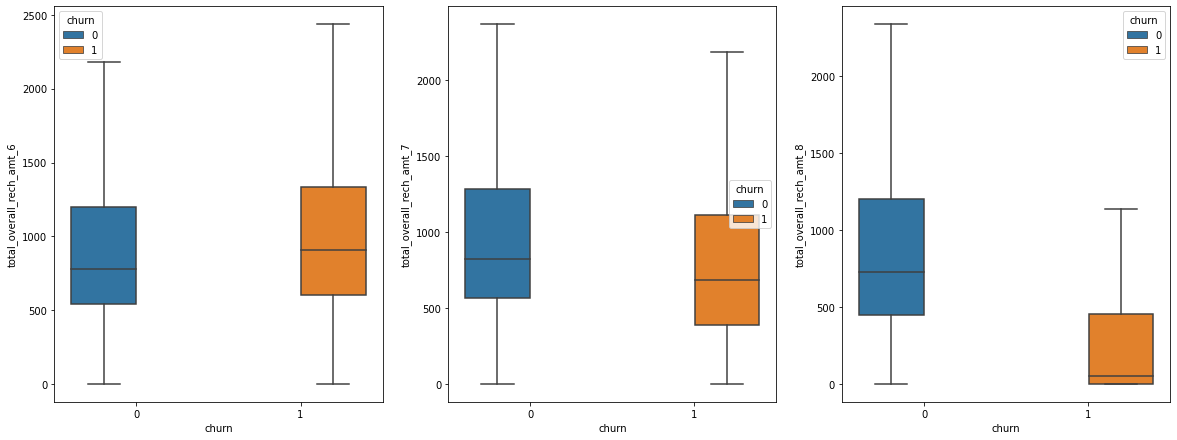

In [ ]:
plot_box_chart('total_overall_rech_amt')

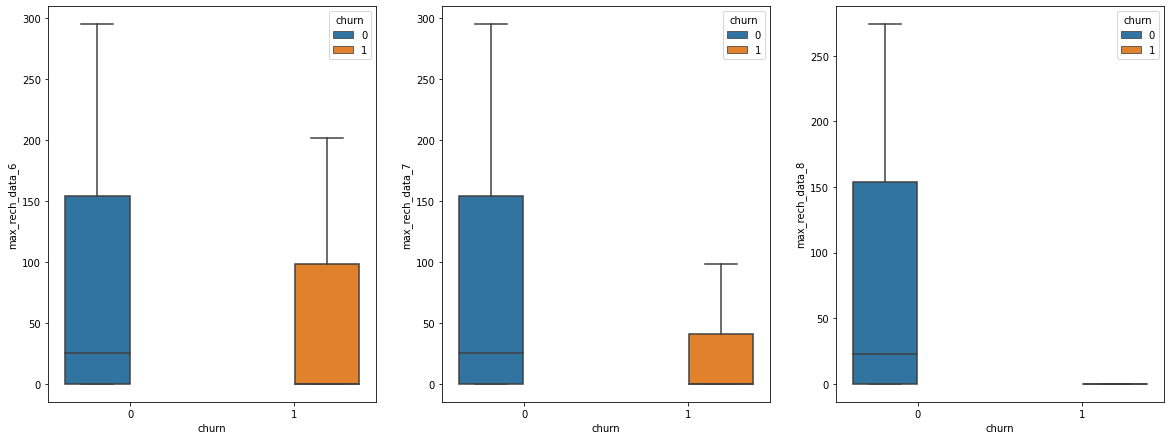

In [ ]:
plot_box_chart('max_rech_data')

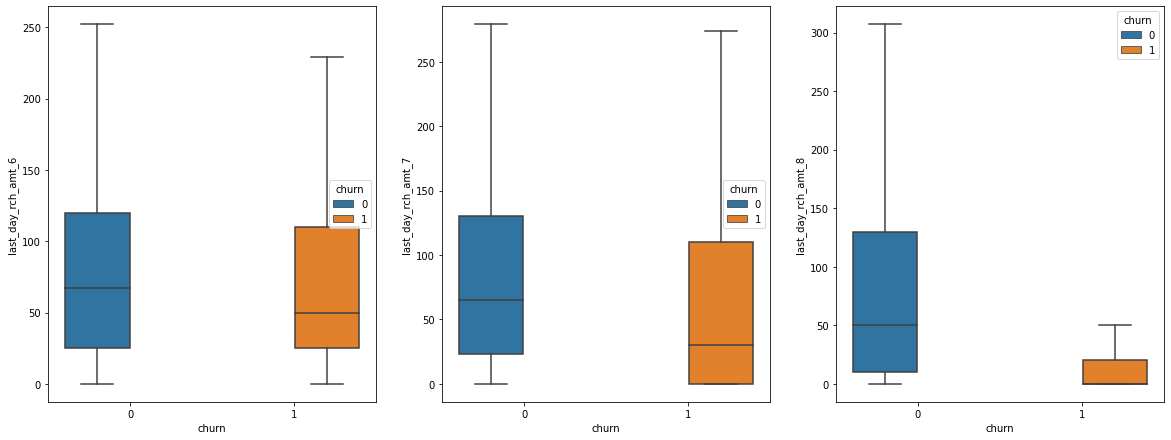

In [ ]:
plot_box_chart('last_day_rch_amt')

### Conclusion : We see that from the above plots total_rech_amt_data, max_rech_data, last_day_rch_amt- for all reacharges has drastically decreased for the churn customers in the 8th month

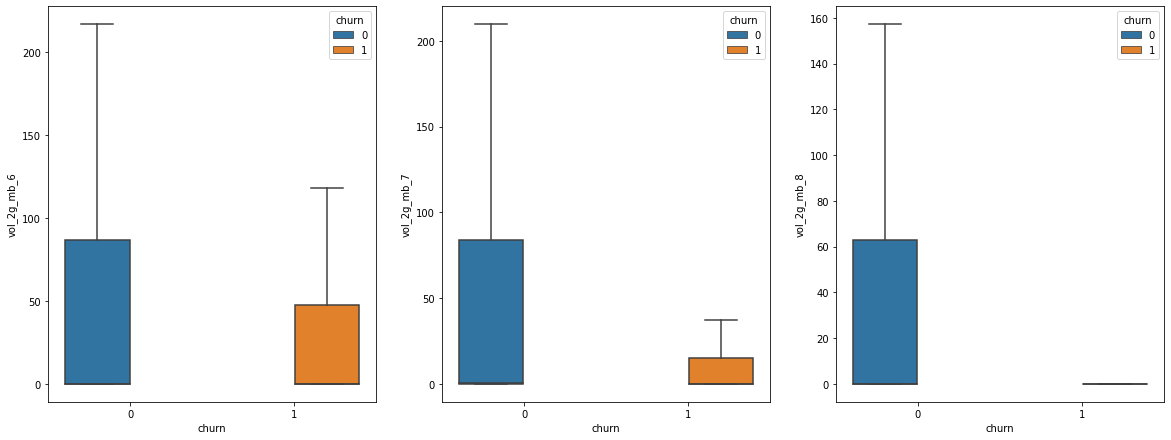

In [ ]:
plot_box_chart('vol_2g_mb')

### Conclusion : Data usage of 2g/3g has drastically decreased for churn customers as we ove from 6th to 8th month

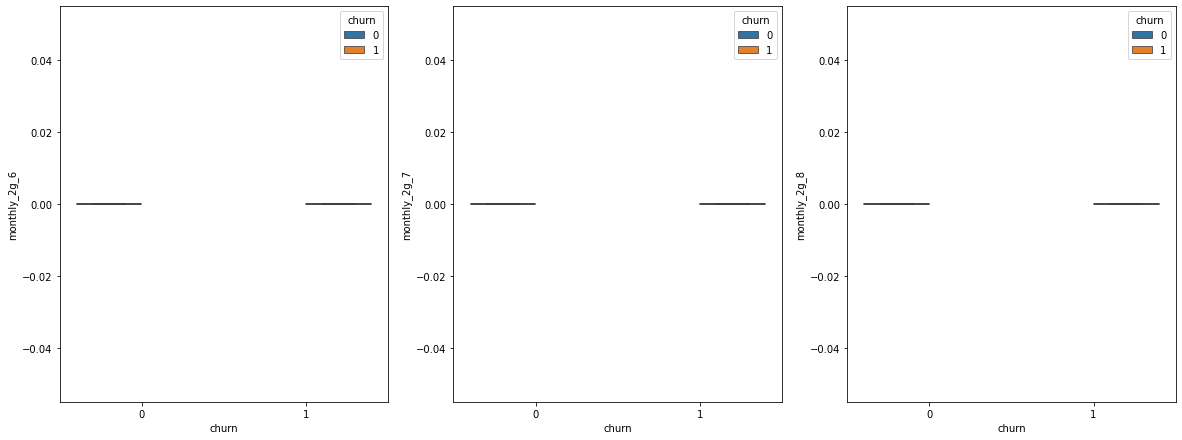

In [ ]:
plot_box_chart('monthly_2g')

Creating a new function to replot the above plots 

In [ ]:
def mean_bar_chart(column_list):
    df=churn_high_value
    churn_0=df[df.churn==0].filter(column_list)
    churn_1=df[df.churn==1].filter(column_list)
    mean_churn_0=pd.DataFrame([churn_0.mean()],index={'Non Churn'})
    mean_churn_1=pd.DataFrame([churn_1.mean()],index={'Churn'})
    mean_churn_0_1=pd.concat([mean_churn_0,mean_churn_1])
    mean_churn_0_1.T.plot.bar()
    plt.show()
    return mean_churn_0_1

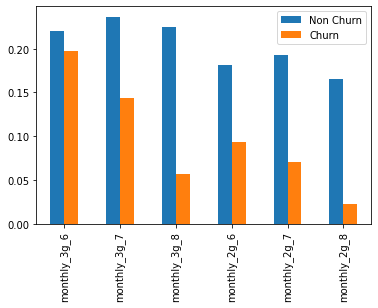

,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8
Non Churn,0.220,0.237,0.225,0.182,0.193,0.165
Churn,0.197,0.144,0.057,0.093,0.071,0.023


In [ ]:
column_list_monthly_2_3g=['monthly_3g_6','monthly_3g_7','monthly_3g_8','monthly_2g_6','monthly_2g_7','monthly_2g_8']
mean_bar_chart(column_list_monthly_2_3g)

### Conclusion: Monthly 2g/3g service scheme have drastically decreased for 8th month

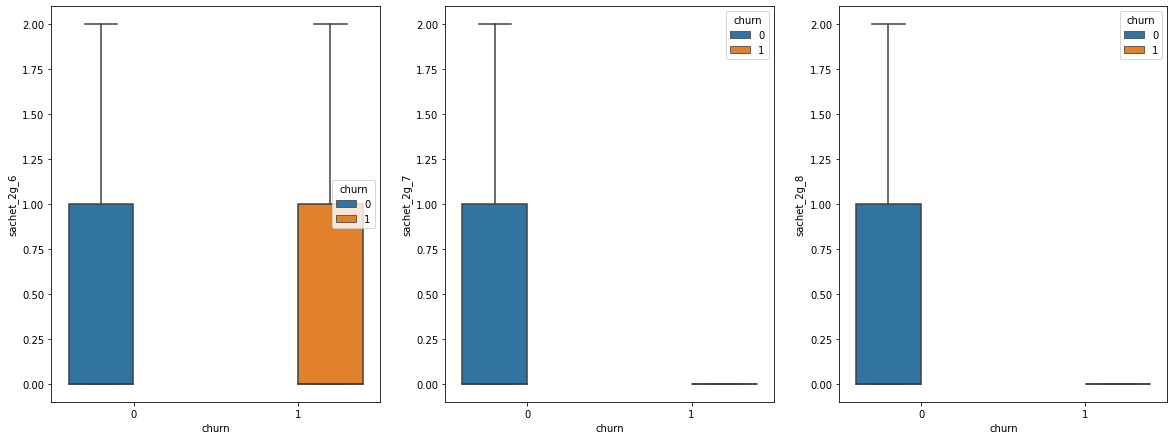

In [ ]:
plot_box_chart('sachet_2g')

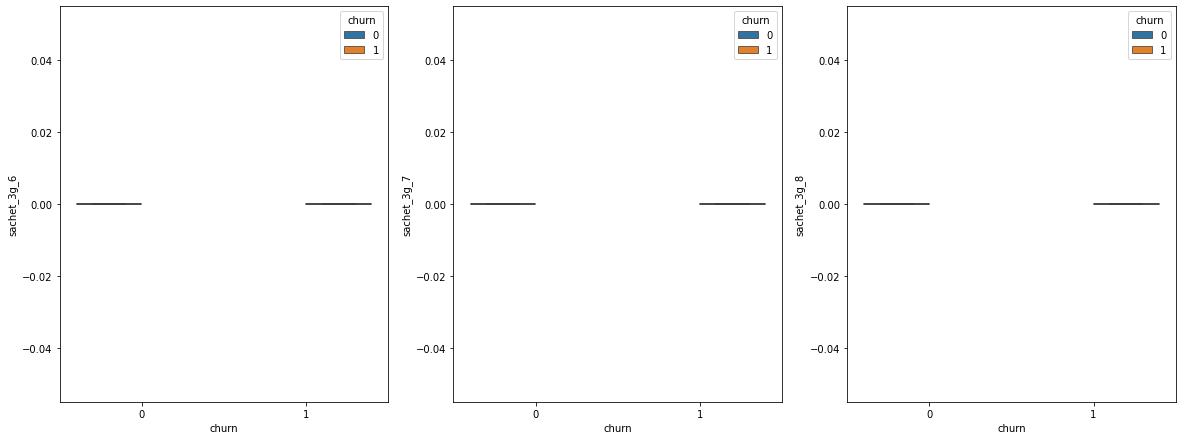

In [ ]:
plot_box_chart('sachet_3g')

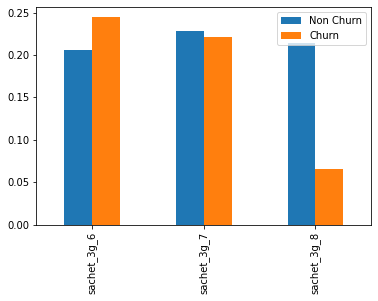

,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,0.206,0.228,0.215
Churn,0.244,0.221,0.065


In [ ]:
column_list_sachet=['sachet_3g_6','sachet_3g_7','sachet_3g_8']
mean_bar_chart(column_list_sachet)

### Conclusion : Monthly 2g/3g sachet service scheme have drastically decreased for 8th month

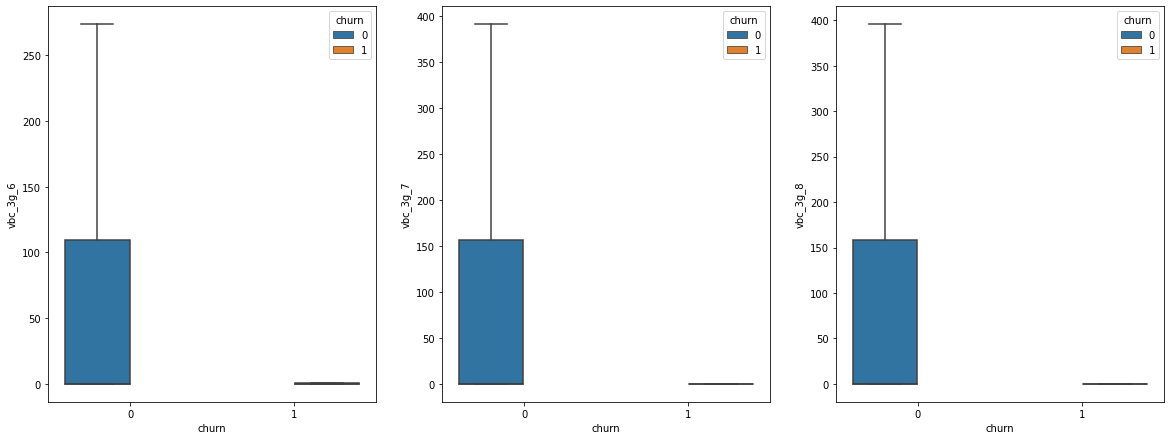

In [ ]:
plot_box_chart('vbc_3g')

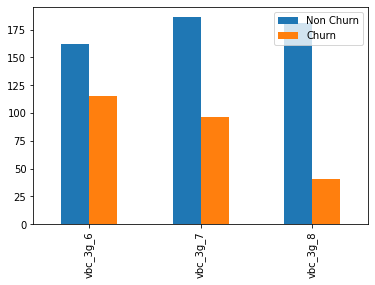

,vbc_3g_6,vbc_3g_7,vbc_3g_8
Non Churn,162.370,186.206,180.501
Churn,115.097,96.076,40.852


In [ ]:
column_list_vbc=['vbc_3g_6','vbc_3g_7','vbc_3g_8']
mean_bar_chart(column_list_vbc)

### Conclusion: Volume based cost have drastically decreased for 8th month

## 4.2 : Checking the correlations 

In [ ]:
churn_high_value.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,sep_vbc_3g,total_data_recharge_6,total_data_recharge_7,total_data_recharge_8,total_overall_rech_amt_6,total_overall_rech_amt_7,total_overall_rech_amt_8
mobile_number,1.000,0.034,0.029,0.035,0.011,0.006,0.009,0.021,0.012,0.018,0.009,-0.004,0.001,0.005,-0.002,-0.003,0.047,0.045,0.044,0.079,0.075,0.078,0.051,0.052,0.055,-0.007,-0.006,0.004,0.085,0.082,0.083,-0.017,-0.021,-0.017,-0.026,-0.029,-0.026,0.026,0.018,0.021,-0.028,-0.033,-0.027,0.006,0.008,0.011,-0.019,-0.022,-0.015,-0.007,-0.001,0.001,0.022,0.014,0.020,0.032,0.029,0.032,0.062,0.056,0.058,0.054,0.055,0.052,0.069,0.065,0.067,-0.002,0.003,-0.002,-0.011,-0.012,-0.014,0.014,0.011,0.013,-0.006,-0.004,-0.008,0.059,0.054,0.055,0.029,0.039,0.036,0.003,0.001,0.001,0.013,0.009,0.009,-0.029,-0.043,-0.036,0.058,0.059,0.063,0.045,0.052,0.045,-0.001,0.004,0.011,-0.041,-0.040,-0.031,-0.011,-0.008,-0.001,-0.015,-0.018,-0.019,-0.020,-0.010,-0.006,0.008,0.009,0.012,-0.000,0.001,0.007,-0.017,-0.014,-0.002,0.009,0.010,0.008,-0.042,-0.041,-0.032,0.004,0.006,0.014,-0.015,-0.013,-0.010,-0.019,-0.019,-0.007,0.316,-0.032,-0.028,-0.038,-0.008,-0.018,-0.018,-0.008,-0.005,-0.005,0.004
arpu_6,0.034,1.000,0.672,0.613,0.343,0.216,0.185,0.507,0.340,0.288,0.122,0.084,0.093,0.195,0.143,0.125,0.165,0.128,0.124,0.329,0.246,0.221,0.137,0.114,0.105,0.062,0.014,0.007,0.329,0.246,0.223,0.272,0.162,0.135,0.299,0.181,0.141,0.066,0.054,0.044,0.384,0.231,0.183,0.470,0.404,0.369,0.120,0.068,0.046,0.053,0.024,0.016,0.555,0.363,0.302,0.079,0.063,0.064,0.183,0.149,0.127,0.048,0.039,0.038,0.180,0.143,0.125,0.085,0.061,0.058,0.096,0.066,0.064,0.033,0.032,0.023,0.125,0.086,0.079,0.226,0.169,0.151,0.091,0.005,-0.018,0.102,0.063,0.071,0.015,0.024,0.013,0.350,0.136,0.119,0.338,0.262,0.285,0.267,0.207,0.199,0.073,-0.022,0.025,-0.165,-0.209,-0.162,0.090,0.020,0.035,-0.063,-0.099,-0.078,0.153,0.070,0.085,0.346,0.198,0.213,0.256,0.106,0.146,-0.110,-0.193,-0.121,-0.039,-0.084,-0.061,-0.158,-0.194,-0.152,0.176,0.081,0.104,-0.003,-0.025,-0.018,-0.

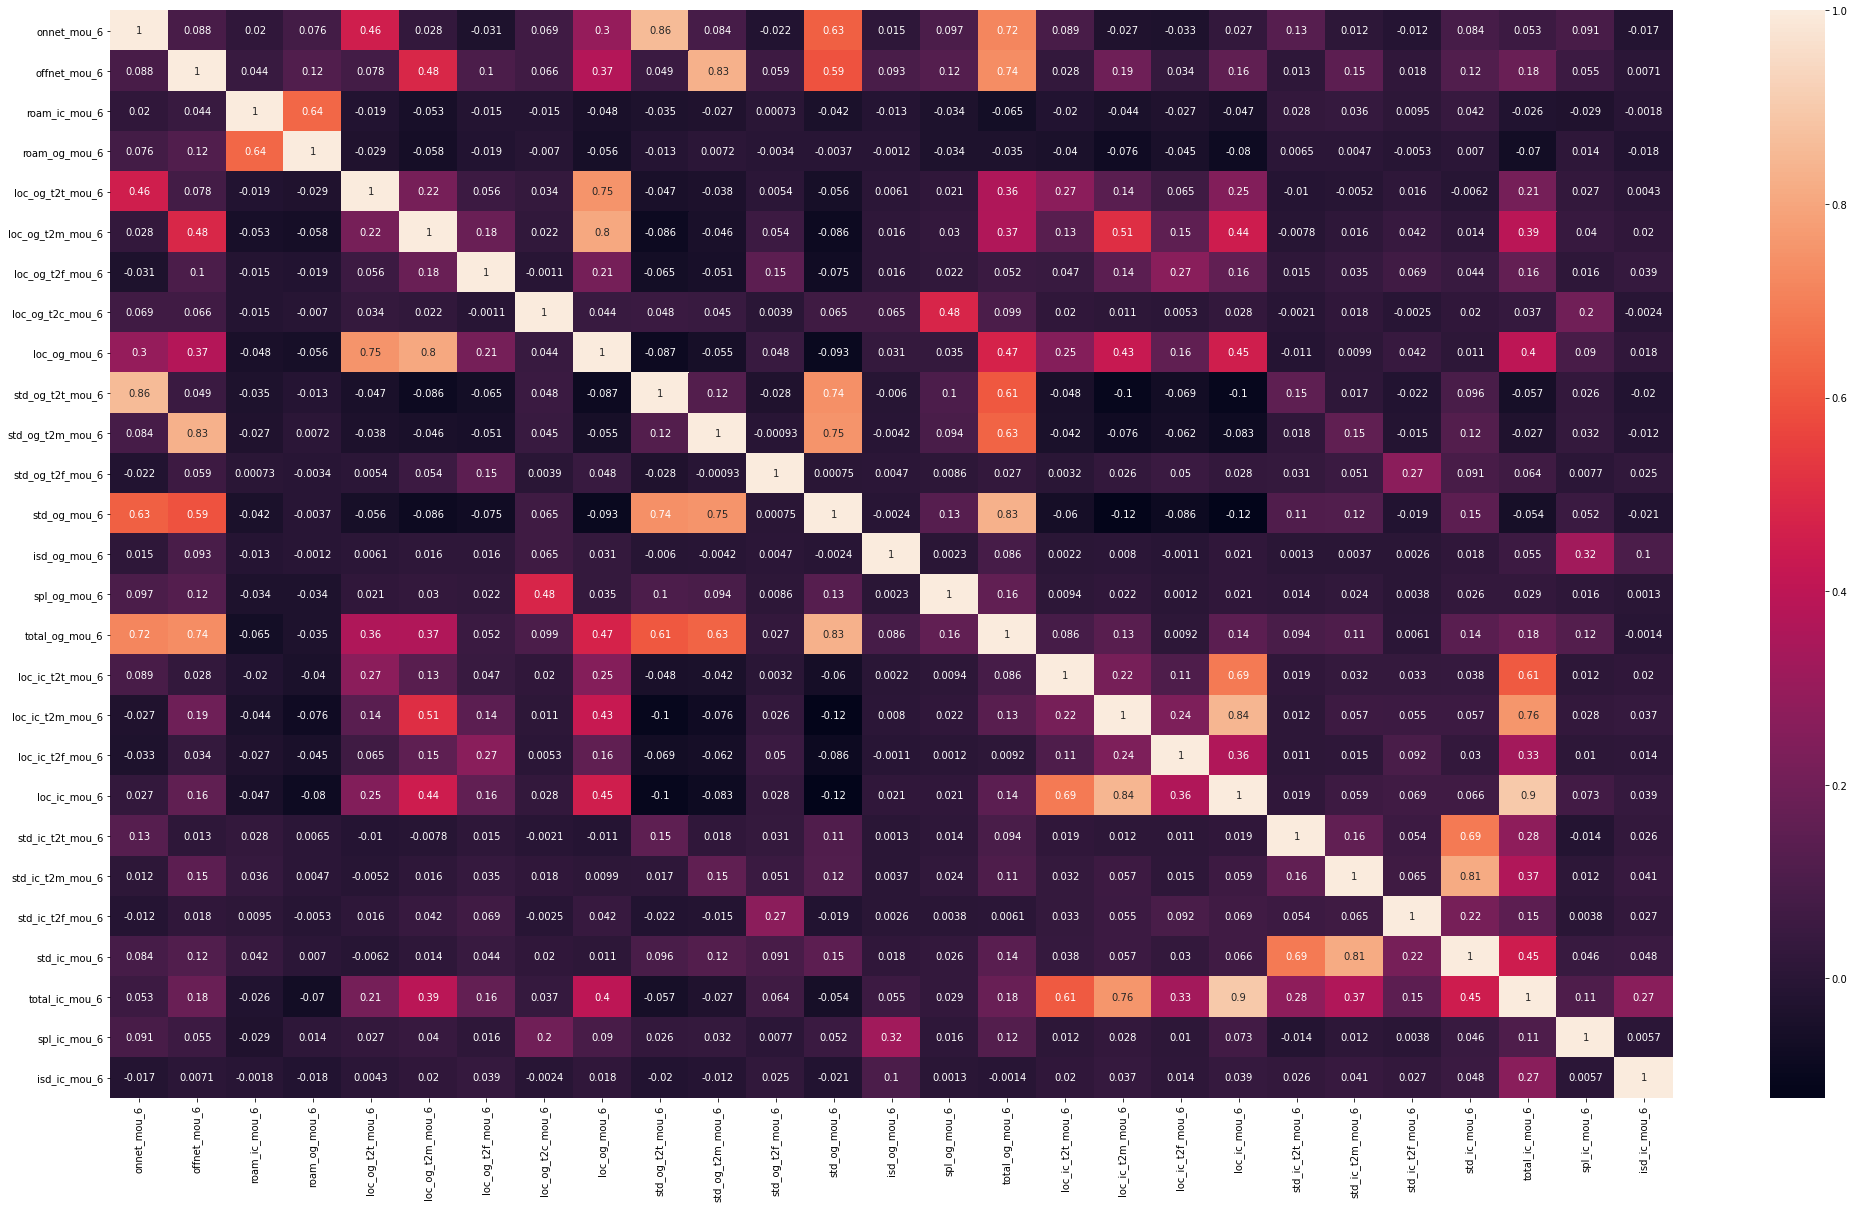

In [ ]:
mou_columns_6 = churn_high_value.columns[churn_high_value.columns.str.contains('mou_6')]
plt.figure(figsize=[35,20])
sns.heatmap(churn_high_value[mou_columns_6].corr(),annot=True)
plt.show()

Checking the correlation of the ic and og mou with other mou fields

In [ ]:
print(churn_high_value.loc[21,'total_ic_mou_6'],"==",churn_high_value.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(churn_high_value.loc[8,'total_og_mou_6'],"==",churn_high_value.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())


89.49 == 87.67
3152.43 == 3152.4199999999996


### Conclusion: We can see that total_ic_mou_6, total_og_mou_6, have high correlation with other fileds 


#### Hence we can delete below columns:
1.  loc_ic_mou_6
2. roam_ic_mou_6
3. isd_ic_mou_6
4. spl_ic_mou_6
5. std_ic_mou_6
6. loc_og_mou_6
7. std_og_mou_6
8. spl_og_mou_6
9. isd_og_mou_6
10. og_others_6
and similarly deleting same columns for month 7 and 8

In [ ]:
column_mou_drop_list=['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6','loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6',
                     'loc_ic_mou_7','roam_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','std_ic_mou_7','loc_og_mou_7','std_og_mou_7','spl_og_mou_7','isd_og_mou_7','og_others_7',
                     'loc_ic_mou_8','roam_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','std_ic_mou_8','loc_og_mou_8','std_og_mou_8','spl_og_mou_8','isd_og_mou_8','og_others_8']
churn_high_value.drop(column_mou_drop_list,axis=1,inplace=True)

In [ ]:
churn_high_value.shape

(30001, 121)

### Conclusion: Now we have 121 columns

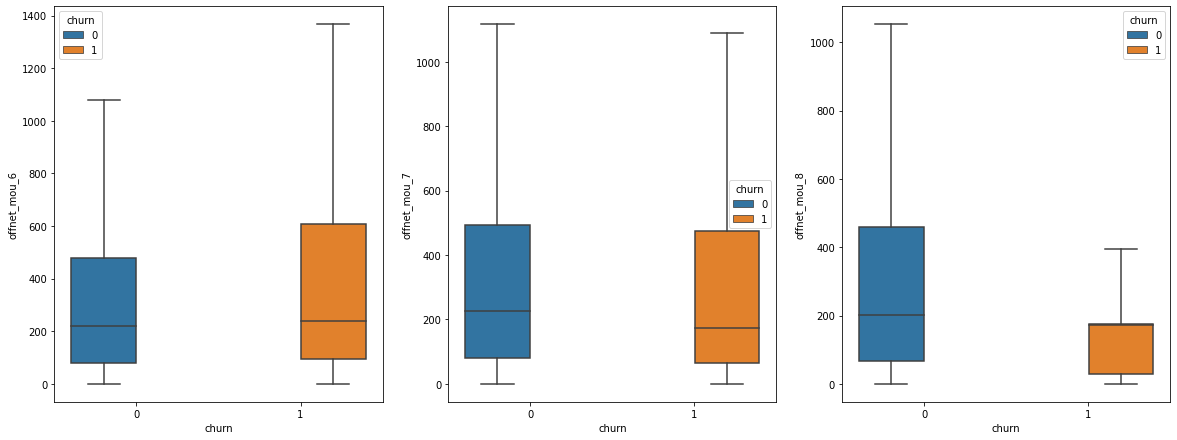

In [ ]:
plot_box_chart('offnet_mou')

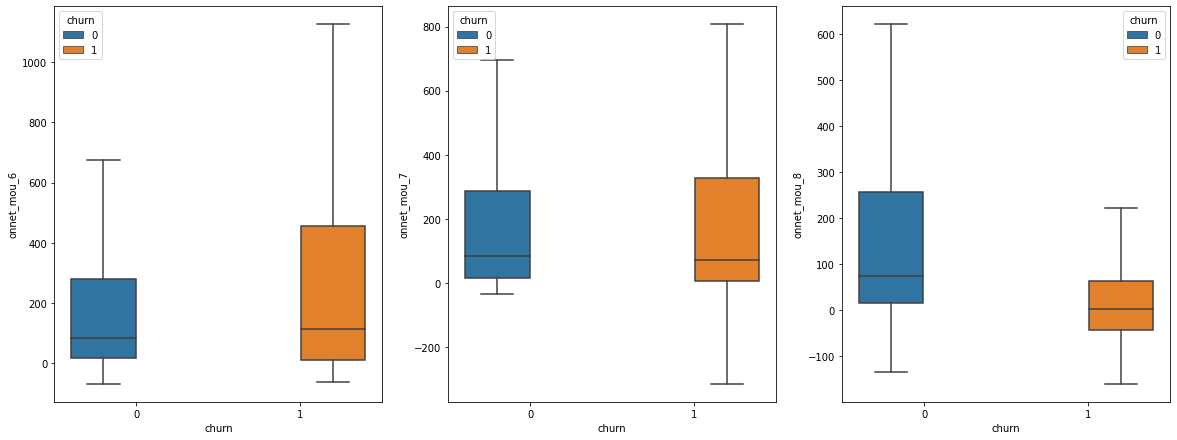

In [ ]:
plot_box_chart('onnet_mou')

### Conclusion: Onnet and offnet has decreased for churn customers in the 8th month

## Step 5 : Pre processing for modelling - Scaling/ PCA/ SMOTE/ Train-test split

### 5.1 : Taking a backup - as a practice

In [ ]:
churn_high_value_pca = churn_high_value.copy()

Checking the imbalance in the data

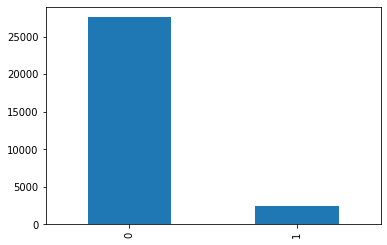

In [ ]:
churn_high_value['churn'].value_counts().plot.bar()

As the above plot shows we have skewed data in order to handle the imbalance we need to use SMOTE later

### 5.2 : Scaling and popping the target variable churn

In [ ]:
Y = churn_high_value_pca["churn"]
X = churn_high_value_pca.drop(["churn"],axis=1)

In [ ]:
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_scale_final = pd.DataFrame(X_scaled, columns=X_col)

### 5.3 : Principal Component Analysis - PCA

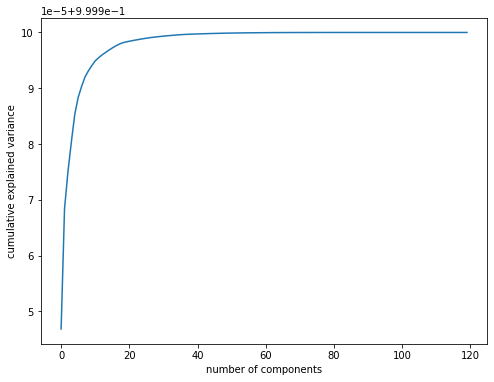

In [ ]:
pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X)
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Conclusion: approximately 20 variables are explaining 96% of the variance of the dataset

### 5.4 : Using SMOTE for data imbalance and train test split and PCA with 20 features
We will split train data to 70% and test data to 30%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=100)
print('Shape of xtrain: ',x_train.shape)
print('Shape of xtest: ',x_test.shape)
print('Using SMOTE for data imbalance: ')
smote = SMOTE(random_state=100, sampling_strategy=0.6)
x_tr,y_tr = smote.fit_sample(x_train,y_train)
print('x_tr shape after applying SMOTE',x_tr.shape)
# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=20)    
x_tr_pca = pca.fit_transform(x_tr)
x_test_pca = pca.transform(x_test)
print('x_tr_pca shape after applying pca',x_tr_pca.shape)

Shape of xtrain:  (21000, 120)
Shape of xtest:  (9001, 120)
Using SMOTE for data imbalance: 
x_tr shape after applying SMOTE (30894, 120)
x_tr_pca shape after applying pca (30894, 20)


## Step 7 : Data Modelling using logistic Regression

### 7.1 : Using Logistic regression to make prediction 

In [ ]:
lr = LogisticRegression()
lr.fit(x_tr_pca, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = lr.predict(x_test_pca)
y_pred_lr_df = pd.DataFrame(y_pred_lr)
y_pred_lr_df = pd.DataFrame(y_pred_lr)

### 7.2 : Printing confusion matrix

In [ ]:
print(confusion_matrix(y_test,y_pred_lr))

[[5902 2349]
 [ 113  637]]


### 7.3 : Checking accuracy of the model

In [ ]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred_lr))

Logistic Regression accuracy with PCA:  0.726474836129319


### Conclusion : We have accuracy of 72% with above model with logistic regression on test data 

### Step 8 : Building a Tree Model : Random forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_tr_pca,y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 8.2 : Making predictions on the test data

In [ ]:
y_pred_tree = rfc.predict(x_test_pca)

### 8.3 : Printing confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
print(cm)

[[7698  553]
 [ 335  415]]


### 8.4 : Checking the accuracy of the model

In [ ]:
accuracy = round(accuracy_score(y_test,y_pred_tree),2)
recall = round(recall_score(y_test,y_pred_tree),2)
precision = round(precision_score(y_test,y_pred_tree),2)
auc = round(roc_auc_score(y_test,y_pred_tree),2)
f1 = round(f1_score(y_test,y_pred_tree),2)
   

In [ ]:
print("Accuracy: \t", round(accuracy, 2), 
      "\n", "Recall: \t", round(recall, 2), "\n", 
      "Precision: \t", round(precision, 2),"\n", 
      "auc: \t", round(auc, 2), "\n", 
      "f1: \t", round(f1, 2),sep='')

Accuracy: 	0.9
Recall: 	0.55
Precision: 	0.43
auc: 	0.74
f1: 	0.48


### Conclusion : In the Random forest model , we have got 
### 1. accuracy of 0.9
### 2. Recall : 0.55 
### 3. Precision : 0.43
### 4. auc : 0.74
### 5. F1 : 0.48


## Step 9 - Hyperparameter tuning

### 9.1 : Create a function for tuning the hyper parameters

In [ ]:
def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break
    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

### 9.2 : Parameterize the model

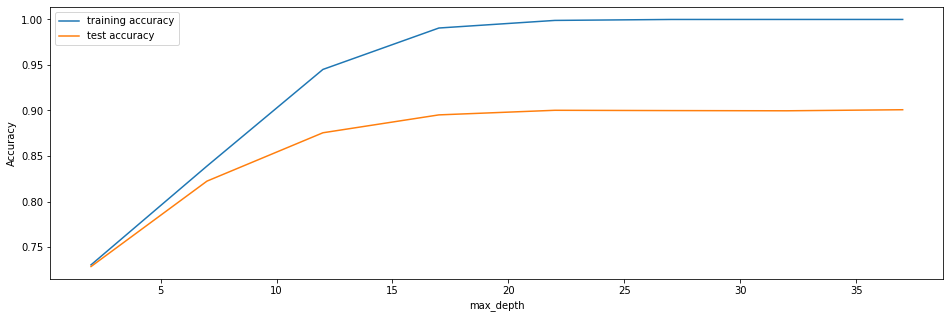

In [ ]:
parameters = {'max_depth': range(2, 40, 5)}
tune_hyperparameter(parameters,x_tr_pca,y_tr)

### Conclusion :12 and 18 value have peek convergens and can be used for grid veiw search.

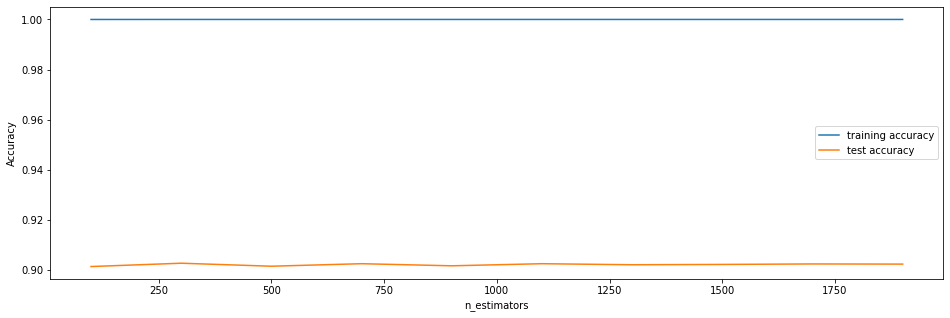

In [ ]:
parameters = {'n_estimators': range(100, 2000, 200)}
tune_hyperparameter(parameters,x_tr_pca,y_tr)

### Conclusion: Using 300 for grid search as we can see a dip at 300 and after that the graph is almost uniform

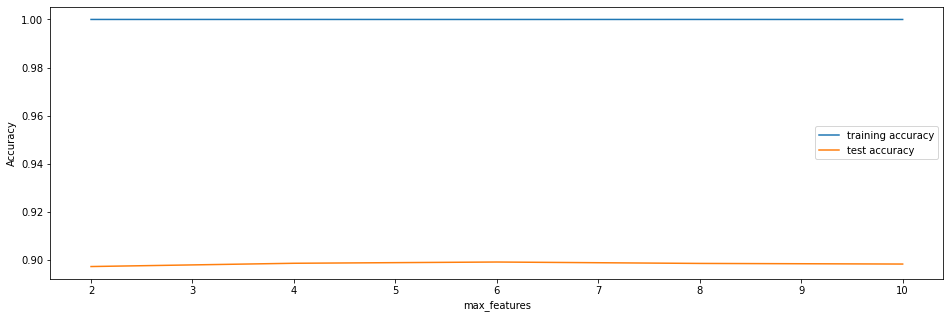

In [ ]:
# parameters to build the model on
parameters = {'max_features': [0,2,4,6,8,10]}
tune_hyperparameter(parameters,x_tr_pca,y_tr,4)

### Conclusion: Between 4 and 6 we will choose 6 as it shows a spike in test score 

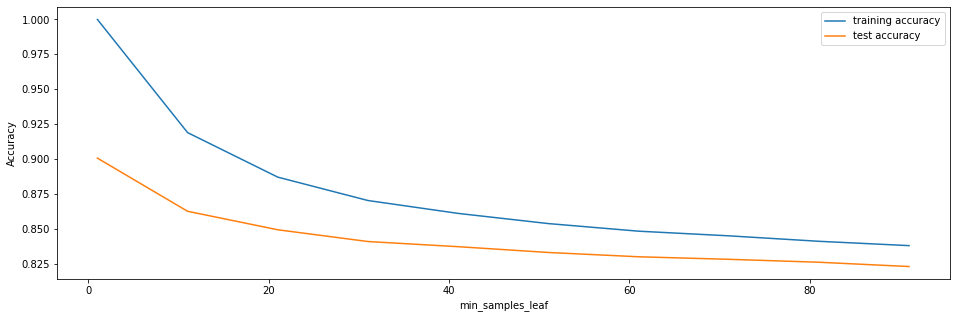

In [ ]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 100, 10)}
tune_hyperparameter(parameters,x_tr_pca,y_tr)

### Conclusion : The more the sample leaves the more over fitted the model , there fore it makes sense to restrict the samples to 10

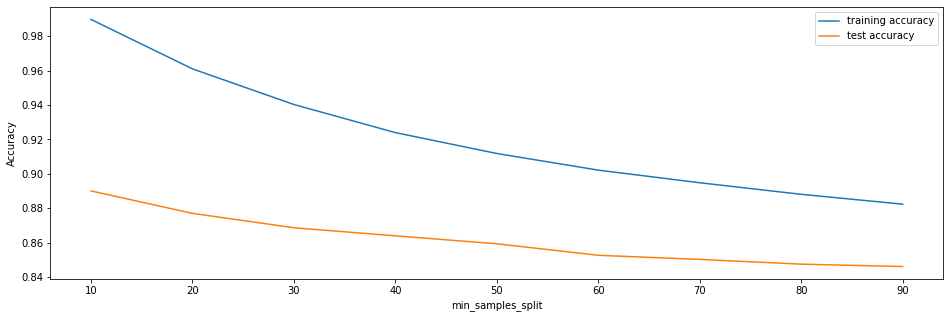

In [ ]:
# parameters to build the model on
parameters = {'min_samples_split': range(10, 100, 10)}
tune_hyperparameter(parameters,x_tr_pca,y_tr)

### 9.3 Using GridsearchCV to find the optimal value of alpha to hyper tune the parameters

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12,18],
    'n_estimators': [300],
    'max_features': [6],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [ ]:
rf_grid_search.fit(x_tr_pca,y_tr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 29.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print('We get an accuracy of '+str(round(rf_grid_search.best_score_,2))+' using '+str(rf_grid_search.best_params_))

We get an accuracy of 0.87 using {'max_depth': 18, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 300}


### Conclusion : We are getting accuracy of : 87% on the train data 


### 9.4 : Using Random forest again to make predictions

In [ ]:
rfc = RandomForestClassifier(max_depth=18,
                             max_features=6,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(x_tr_pca,y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_tree_final = rfc.predict(x_test_pca)

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree_final)
print(cm)
accuracy = round(accuracy_score(y_test,y_pred_tree_final),2)
recall = round(recall_score(y_test,y_pred_tree_final),2)
precision = round(precision_score(y_test,y_pred_tree_final),2)
auc = round(roc_auc_score(y_test,y_pred_tree_final),2)
f1 = round(f1_score(y_test,y_pred_tree_final),2)
print("Accuracy: \t", round(accuracy, 2), "\n", "Recall: \t", round(recall, 2), "\n", "Precision: \t", round(precision, 2),
       "\n", "auc: \t", round(auc, 2), "\n", "f1: \t", round(f1, 2),sep='')

[[7581  670]
 [ 290  460]]
Accuracy: 	0.89
Recall: 	0.61
Precision: 	0.41
auc: 	0.77
f1: 	0.49


### Conclusion : In the Random forest model in this iteration , we have got for test data 
### 1. accuracy of 0.89
### 2. Recall : 0.61
### 3. Precision : 0.41
### 4. auc : 0.77
### 5. F1 : 0.49


## Step 10 : Prediction of top 15 features - Recursive factor elimination with 15 features  

In [ ]:
LR_FS = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(LR_FS, 15) 
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('mobile_number', True, 1),
 ('arpu_6', False, 32),
 ('arpu_7', False, 4),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 43),
 ('onnet_mou_7', False, 39),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 82),
 ('offnet_mou_7', False, 19),
 ('offnet_mou_8', True, 1),
 ('roam_og_mou_6', False, 52),
 ('roam_og_mou_7', False, 45),
 ('roam_og_mou_8', False, 48),
 ('loc_og_t2t_mou_6', False, 34),
 ('loc_og_t2t_mou_7', False, 27),
 ('loc_og_t2t_mou_8', False, 24),
 ('loc_og_t2m_mou_6', False, 16),
 ('loc_og_t2m_mou_7', False, 13),
 ('loc_og_t2m_mou_8', False, 7),
 ('loc_og_t2f_mou_6', False, 66),
 ('loc_og_t2f_mou_7', False, 64),
 ('loc_og_t2f_mou_8', False, 63),
 ('loc_og_t2c_mou_6', False, 83),
 ('loc_og_t2c_mou_7', False, 73),
 ('loc_og_t2c_mou_8', False, 65),
 ('std_og_t2t_mou_6', False, 20),
 ('std_og_t2t_mou_7', False, 49),
 ('std_og_t2t_mou_8', False, 21),
 ('std_og_t2m_mou_6', False, 18),
 ('std_og_t2m_mou_7', False, 46),
 ('std_og_t2m_mou_8', False, 15),
 ('std_og_t2f_mou_6', Fal

Below are the features supported by RFE

In [ ]:
col=x_train.columns[rfe.support_]
x_train_rfe=x_train[col]

In [ ]:
x_train_sm = sm.add_constant(x_train_rfe)
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4144.0
Date:                Mon, 25 Jan 2021   Deviance:                       8287.9
Time:                        16:09:21   Pearson chi2:                 5.60e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -230.3704    292.291     -0.788      0.431    -803.249     342.509
mobile_number             3.275e-08   4.18e-08      0.784      0.433   -4.91e-08    1.15e-07
arpu_8                      -0.0017      0.000     -5.681      0.000      -0.002      -0.001
onnet_mou_8                  0.0038      0.000     12.975      0.000       0.003       0.004
offnet_mou_8                 0.0041      0.000     14.378      0.000       0.004       0.005
total_og_mou_8              -0.0041      0.000    -16.813      0.000      -0.005      -0.004
total_ic_mou_7               0.0015      0.000      9.359      0.000       0.001       0.002
total_ic_mou_8              -0.0063      0.000    -17.072      0.000      -0.007      -0.006
vol_3g_mb_7                 -0.0001   6.22e-05     -2.041      0.041      -0.000   -5.05e-06
vol_3g_mb_8                 -0.0002      0.000     -2.377      0.017      -0.000   -4.26e-05
aon                         -0.0002   4.05e-05     -6.178      0.000      -0.000      -0.000
total_data_recharge_7       -0.0011   9.58e-05    -10.979      0.000      -0.001      -0.001
total_data_recharge_8        0.0001      0.000      0.433      0.665      -0.000       0.001
total_overall_rech_amt_6     0.0002   2.87e-05      6.633      0.000       0.000       0.000
total_overall_rech_amt_7     0.0010   8.61e-05     11.367      0.000       0.001       0.001
total_overall_rech_amt_8    -0.0012      0.000     -5.364      0.000      -0.002      -0.001
============================================================================================
"""

### 10.1 Using Variance Inflation Factor to manually eliminate features on Pvalues 

Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,total_overall_rech_amt_8,105.220
11,total_data_recharge_8,86.180
4,total_og_mou_8,47.630
3,offnet_mou_8,23.280
13,total_overall_rech_amt_7,21.600
2,onnet_mou_8,21.260
10,total_data_recharge_7,20.390
1,arpu_8,15.020
0,mobile_number,4.570
6,total_ic_mou_8,3.270


### Conclusion: As we see from the result of the VIF/RFE based on high P value we will eliminate :
1.  total_data_recharge_8

In [ ]:
x_train_rfe.drop('total_data_recharge_8',axis=1,inplace=True)

In [ ]:
x_train_sm = sm.add_constant(x_train_rfe)
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4144.1
Date:                Mon, 25 Jan 2021   Deviance:                       8288.1
Time:                        16:09:22   Pearson chi2:                 6.15e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -231.8343    292.240     -0.793      0.428    -804.614     340.946
mobile_number             3.296e-08   4.17e-08      0.790      0.430   -4.89e-08    1.15e-07
arpu_8                      -0.0018      0.000     -6.961      0.000      -0.002      -0.001
onnet_mou_8                  0.0038      0.000     13.391      0.000       0.003       0.004
offnet_mou_8                 0.0041      0.000     14.837      0.000       0.004       0.005
total_og_mou_8              -0.0041      0.000    -17.090      0.000      -0.005      -0.004
total_ic_mou_7               0.0015      0.000      9.356      0.000       0.001       0.002
total_ic_mou_8              -0.0063      0.000    -17.135      0.000      -0.007      -0.006
vol_3g_mb_7                 -0.0001    6.2e-05     -2.074      0.038      -0.000   -7.05e-06
vol_3g_mb_8                 -0.0002      0.000     -2.347      0.019      -0.000   -3.93e-05
aon                         -0.0002   4.05e-05     -6.179      0.000      -0.000      -0.000
total_data_recharge_7       -0.0011   9.57e-05    -10.990      0.000      -0.001      -0.001
total_overall_rech_amt_6     0.0002   2.87e-05      6.641      0.000       0.000       0.000
total_overall_rech_amt_7     0.0010   8.59e-05     11.409      0.000       0.001       0.001
total_overall_rech_amt_8    -0.0012      0.000    -10.110      0.000      -0.001      -0.001
============================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,47.610
3,offnet_mou_8,23.270
12,total_overall_rech_amt_7,21.600
2,onnet_mou_8,21.250
10,total_data_recharge_7,20.380
0,mobile_number,4.560
1,arpu_8,4.090
6,total_ic_mou_8,3.270
5,total_ic_mou_7,3.150
7,vol_3g_mb_7,3.100


###Conclusion : mobile_number has high p value , hence deleting the column

In [ ]:
x_train_rfe.drop('mobile_number',axis=1,inplace=True)

In [ ]:
x_train_sm = sm.add_constant(x_train_rfe)
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4144.4
Date:                Mon, 25 Jan 2021   Deviance:                       8288.7
Time:                        16:09:23   Pearson chi2:                 6.37e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.1049      0.067    -16.477      0.000      -1.236      -0.974
arpu_8                      -0.0018      0.000     -6.955      0.000      -0.002      -0.001
onnet_mou_8                  0.0038      0.000     13.379      0.000       0.003       0.004
offnet_mou_8                 0.0041      0.000     14.830      0.000       0.004       0.005
total_og_mou_8              -0.0041      0.000    -17.078      0.000      -0.005      -0.004
total_ic_mou_7               0.0015      0.000      9.367      0.000       0.001       0.002
total_ic_mou_8              -0.0063      0.000    -17.143      0.000      -0.007      -0.006
vol_3g_mb_7                 -0.0001    6.2e-05     -2.080      0.038      -0.000   -7.46e-06
vol_3g_mb_8                 -0.0002      0.000     -2.353      0.019      -0.000   -3.99e-05
aon                         -0.0002   3.88e-05     -6.208      0.000      -0.000      -0.000
total_data_recharge_7       -0.0011   9.56e-05    -11.012      0.000      -0.001      -0.001
total_overall_rech_amt_6     0.0002   2.87e-05      6.650      0.000       0.000       0.000
total_overall_rech_amt_7     0.0010   8.59e-05     11.430      0.000       0.001       0.001
total_overall_rech_amt_8    -0.0012      0.000    -10.108      0.000      -0.001      -0.001
============================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,76.330
2,offnet_mou_8,34.530
11,total_overall_rech_amt_7,31.210
1,onnet_mou_8,26.310
9,total_data_recharge_7,22.110
0,arpu_8,7.760
5,total_ic_mou_8,5.190
4,total_ic_mou_7,5.080
6,vol_3g_mb_7,3.580
7,vol_3g_mb_8,3.480


### Conclusion we will now drop total_og_mou based on VIF as P value is below our threshold and small to drop on basis of Pvalues 

In [ ]:
x_train_rfe.drop('total_og_mou_8',axis=1,inplace=True)

In [ ]:
x_train_sm = sm.add_constant(x_train_rfe)
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4296.8
Date:                Mon, 25 Jan 2021   Deviance:                       8593.5
Time:                        16:09:23   Pearson chi2:                 1.05e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0726      0.066    -16.209      0.000      -1.202      -0.943
arpu_8                      -0.0009      0.000     -4.057      0.000      -0.001      -0.000
onnet_mou_8                 -0.0004      0.000     -3.458      0.001      -0.001      -0.000
offnet_mou_8             -8.011e-06      0.000     -0.068      0.946      -0.000       0.000
total_ic_mou_7               0.0017      0.000     10.879      0.000       0.001       0.002
total_ic_mou_8              -0.0083      0.000    -21.845      0.000      -0.009      -0.008
vol_3g_mb_7                 -0.0001   6.15e-05     -1.936      0.053      -0.000    1.45e-06
vol_3g_mb_8                 -0.0003      0.000     -3.281      0.001      -0.001      -0.000
aon                         -0.0002   3.82e-05     -5.663      0.000      -0.000      -0.000
total_data_recharge_7       -0.0011   9.37e-05    -11.789      0.000      -0.001      -0.001
total_overall_rech_amt_6     0.0002   2.83e-05      7.868      0.000       0.000       0.000
total_overall_rech_amt_7     0.0010   8.36e-05     11.983      0.000       0.001       0.001
total_overall_rech_amt_8    -0.0011      0.000    -10.599      0.000      -0.001      -0.001
============================================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_overall_rech_amt_7,31.190
8,total_data_recharge_7,22.090
0,arpu_8,7.730
4,total_ic_mou_8,5.120
3,total_ic_mou_7,5.060
5,vol_3g_mb_7,3.580
6,vol_3g_mb_8,3.480
11,total_overall_rech_amt_8,2.850
9,total_overall_rech_amt_6,2.250
2,offnet_mou_8,2.060


### Conclusion we will now drop offnet_mou_8 based on Pvalues

In [ ]:
x_train_rfe.drop('offnet_mou_8',axis=1,inplace=True)

In [ ]:
x_train_sm = sm.add_constant(x_train_rfe)
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4296.8
Date:                Mon, 25 Jan 2021   Deviance:                       8593.6
Time:                        16:10:38   Pearson chi2:                 1.05e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0730      0.066    -16.272      0.000      -1.202      -0.944
arpu_8                      -0.0009      0.000     -4.711      0.000      -0.001      -0.001
onnet_mou_8                 -0.0004      0.000     -3.594      0.000      -0.001      -0.000
total_ic_mou_7               0.0017      0.000     10.890      0.000       0.001       0.002
total_ic_mou_8              -0.0083      0.000    -21.846      0.000      -0.009      -0.008
vol_3g_mb_7                 -0.0001   6.15e-05     -1.935      0.053      -0.000    1.52e-06
vol_3g_mb_8                 -0.0003      0.000     -3.307      0.001      -0.001      -0.000
aon                         -0.0002    3.8e-05     -5.686      0.000      -0.000      -0.000
total_data_recharge_7       -0.0011   9.36e-05    -11.798      0.000      -0.001      -0.001
total_overall_rech_amt_6     0.0002   2.83e-05      7.868      0.000       0.000       0.000
total_overall_rech_amt_7     0.0010   8.36e-05     11.984      0.000       0.001       0.001
total_overall_rech_amt_8    -0.0011      0.000    -10.600      0.000      -0.001      -0.001
============================================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_overall_rech_amt_7,31.100
7,total_data_recharge_7,22.030
0,arpu_8,6.980
3,total_ic_mou_8,5.080
2,total_ic_mou_7,5.060
4,vol_3g_mb_7,3.580
5,vol_3g_mb_8,3.470
10,total_overall_rech_amt_8,2.850
8,total_overall_rech_amt_6,2.250
6,aon,1.820


### Conclusion we will drop vol_3g_mb_7 based on its high P value

In [ ]:
x_train_rfe.drop('vol_3g_mb_7',axis=1,inplace=True)

In [ ]:
x_train_sm = sm.add_constant(x_train_rfe)
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4298.7
Date:                Mon, 25 Jan 2021   Deviance:                       8597.4
Time:                        16:12:26   Pearson chi2:                 8.91e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0725      0.066    -16.243      0.000      -1.202      -0.943
arpu_8                      -0.0009      0.000     -4.664      0.000      -0.001      -0.001
onnet_mou_8                 -0.0004      0.000     -3.555      0.000      -0.001      -0.000
total_ic_mou_7               0.0017      0.000     10.971      0.000       0.001       0.002
total_ic_mou_8              -0.0083      0.000    -21.860      0.000      -0.009      -0.008
vol_3g_mb_8                 -0.0004   8.91e-05     -4.880      0.000      -0.001      -0.000
aon                         -0.0002    3.8e-05     -5.696      0.000      -0.000      -0.000
total_data_recharge_7       -0.0011   9.44e-05    -11.757      0.000      -0.001      -0.001
total_overall_rech_amt_6     0.0002   2.83e-05      7.729      0.000       0.000       0.000
total_overall_rech_amt_7     0.0010   8.27e-05     11.825      0.000       0.001       0.001
total_overall_rech_amt_8    -0.0011      0.000    -10.425      0.000      -0.001      -0.001
============================================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_overall_rech_amt_7,30.440
6,total_data_recharge_7,22.030
0,arpu_8,6.970
3,total_ic_mou_8,5.080
2,total_ic_mou_7,5.060
9,total_overall_rech_amt_8,2.630
7,total_overall_rech_amt_6,2.250
5,aon,1.820
4,vol_3g_mb_8,1.630
1,onnet_mou_8,1.410


### Conclusion : All P values are 0 now , we will stop eliminating more features

### Final Conclusion and analysis : 
listed below are the 11 features are the most important deciding factors in churn prediction of a given customer

1. total_overall_rech_amt_7
2. total_data_recharge_7
3. arpu_8
4. total_ic_mou_8
5. total_ic_mou_7
6. total_overall_rech_amt_8
7. total_overall_rech_amt_6
8. aon
9. vol_3g_mb_8
10. onnet_mou_8

Strategies to handle customer churn 
Based on our prediction we found the main reasons/features why the customers churn 

1. AON : The customers who are with the telecom service for less than 4 years tend to churn , that means loyal customers for ages tend to stick to the telecom partner 
it also means that we need to take measures to engage with the newer customer on regular basis to know their issues
2. Offers/discounts : Since we know who is at risk we must give targeted offers and discounts 
3. The lesser the recharge customer does the more chances of churn, we must keep a track of recharge history , send them reminders . It is likely that if person decides to recharge for a month , will not churn
4. high value customers : We now know who are the high value customers
we need to pay more attention to them , with regular pro active feedback calls about their user experience 
5. Keep competitive pricing 
6. Follow the pattern in the year when most churns happen and then release new functionality / feature or offer